In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
absent = pd.read_csv('Absenteeism_at_work.csv')
absent.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load,...,Disciplinary_failure,Education,No_of_Children,Social_drinker,Social_smoker,No_of_Pets,Weight,Height,Body_mass_index,Absenteeism_time_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [219]:
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               739 non-null    int64  
 1   Reason_for_absence               739 non-null    int64  
 2   Month_of_absence                 739 non-null    int64  
 3   Day_of_the_week                  739 non-null    int64  
 4   Seasons                          739 non-null    int64  
 5   Transportation_expense           739 non-null    int64  
 6   Distance_from_Residence_to_Work  739 non-null    int64  
 7   Service_time                     739 non-null    int64  
 8   Age                              739 non-null    int64  
 9   Work_load                        739 non-null    float64
 10  Hit_target                       739 non-null    int64  
 11  Disciplinary_failure             739 non-null    int64  
 12  Education             

In [3]:
absent['Reason_for_absence'] = absent['Reason_for_absence'].astype(object)
absent['Month_of_absence'] = absent['Month_of_absence'].astype(object)
absent['Day_of_the_week'] = absent['Day_of_the_week'].astype(object)
absent['Seasons'] = absent['Seasons'].astype(object)
absent['Disciplinary_failure'] = absent['Disciplinary_failure'].astype(object)
absent['Education'] = absent['Education'].astype(object)
absent['No_of_Children'] = absent['No_of_Children'].astype(object)
absent['Social_drinker'] = absent['Social_drinker'].astype(object)
absent['Social_smoker'] = absent['Social_smoker'].astype(object)
absent['No_of_Pets'] = absent['No_of_Pets'].astype(object)

In [221]:
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               739 non-null    int64  
 1   Reason_for_absence               739 non-null    object 
 2   Month_of_absence                 739 non-null    object 
 3   Day_of_the_week                  739 non-null    object 
 4   Seasons                          739 non-null    object 
 5   Transportation_expense           739 non-null    int64  
 6   Distance_from_Residence_to_Work  739 non-null    int64  
 7   Service_time                     739 non-null    int64  
 8   Age                              739 non-null    int64  
 9   Work_load                        739 non-null    float64
 10  Hit_target                       739 non-null    int64  
 11  Disciplinary_failure             739 non-null    object 
 12  Education             

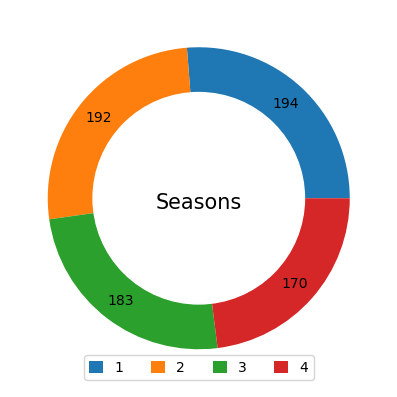

In [235]:
plt.figure(figsize=(9,5), dpi=100)
v_counts = absent.Seasons.value_counts()
plt.pie(x = v_counts, autopct = lambda x: '{:.0f}'.format(x * v_counts.sum()/100), radius=1, pctdistance = 0.85)
plt.title('Seasons', loc = 'Center', y = 0.45, fontsize = 15)
plt.legend(labels = sorted(v_counts.index), loc = 'lower center', 
           ncol = len(v_counts.index), handlelength=1, handleheight=1)
circle = plt.Circle(xy = (0,0), radius = 0.7, color = 'white')
ax = plt.gca()
ax.add_artist(circle)
plt.show()

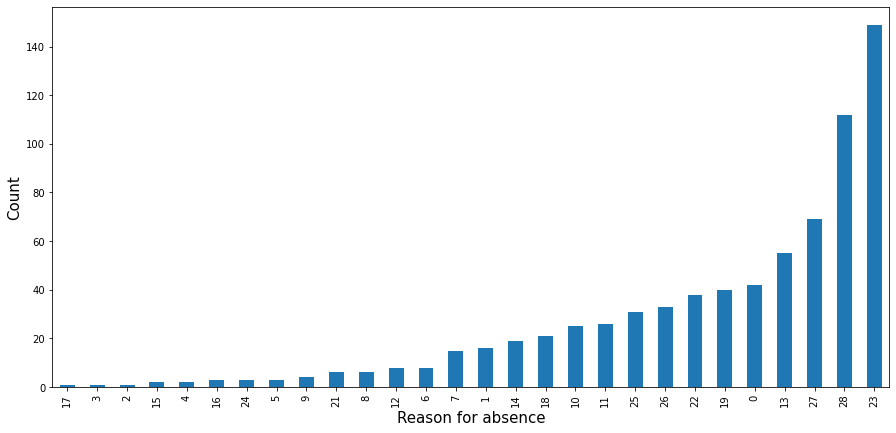

In [257]:
plt.figure(figsize = (15, 7))
absent['Reason_for_absence'].value_counts().sort_values().plot(kind = 'bar')
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Reason for absence', fontsize = 15)
plt.show()

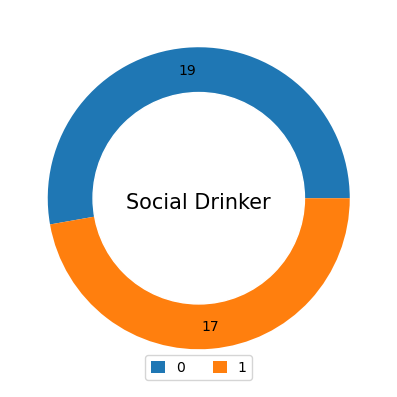

In [190]:
plt.figure(figsize=(9,5), dpi=100)
v_counts = absent.groupby('ID').Social_drinker.unique().apply(lambda x: sum(x)).value_counts()
# v_counts = absent.Social_drinker.value_counts()
plt.pie(x = v_counts, autopct = lambda x: '{:.0f}'.format(x * v_counts.sum()/100), radius=1, pctdistance = 0.85)
plt.title('Social Drinker', loc = 'Center', y = 0.45, fontsize = 15)
plt.legend(labels = sorted(v_counts.index), loc = 'lower center', 
           ncol = len(v_counts.index), handlelength=1, handleheight=1)
circle = plt.Circle(xy = (0,0), radius = 0.7, color = 'white')
ax = plt.gca()
ax.add_artist(circle)
plt.show()

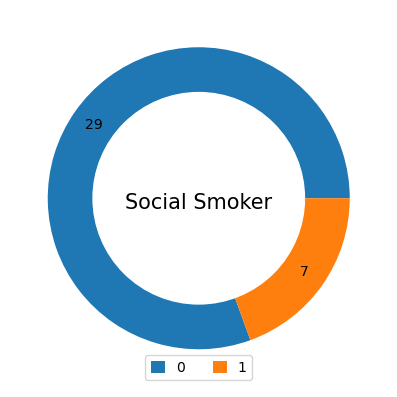

In [191]:
plt.figure(figsize=(9,5), dpi=100)
v_counts = absent.groupby('ID').Social_smoker.unique().apply(lambda x: sum(x)).value_counts()
plt.pie(x = v_counts, autopct = lambda x: '{:.0f}'.format(x * v_counts.sum()/100), radius = 1, pctdistance = 0.85)
plt.title('Social Smoker', loc = 'Center', y = 0.45, fontsize = 15)
plt.legend(labels = sorted(v_counts.index), loc = 'lower center', 
           ncol = len(v_counts.index), handlelength=1, handleheight=1)
circle = plt.Circle(xy = (0,0), radius = 0.7, color = 'white')
ax = plt.gca()
ax.add_artist(circle)
plt.show()

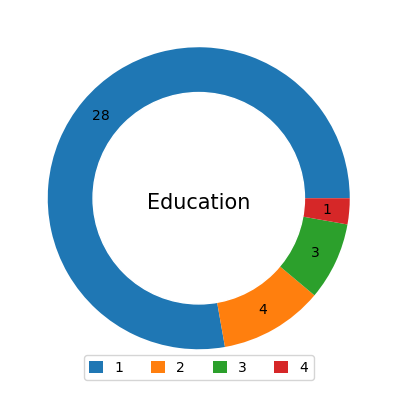

In [213]:
plt.figure(figsize=(9,5), dpi=100)
v_counts = absent.groupby('ID').Education.unique().apply(lambda x: sum(x)).value_counts()
plt.pie(x = v_counts, autopct = lambda x: '{:.0f}'.format(x * v_counts.sum()/100), radius = 1, pctdistance = 0.85)
plt.title('Education', loc = 'Center', y = 0.45, fontsize = 15)
plt.legend(labels = sorted(v_counts.index), loc = 'lower center', 
           ncol = len(v_counts.index), handlelength=1, handleheight=1)
circle = plt.Circle(xy = (0,0), radius = 0.7, color = 'white')
ax = plt.gca()
ax.add_artist(circle)
plt.show()

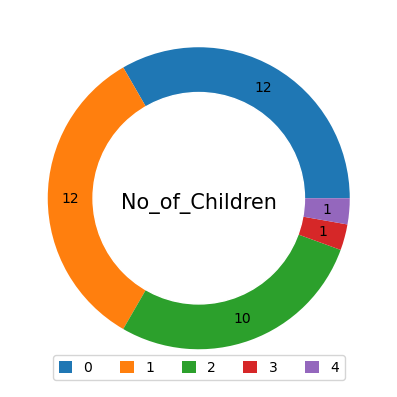

In [214]:
plt.figure(figsize=(9,5), dpi=100)
v_counts = absent.groupby('ID').No_of_Children.unique().apply(lambda x: sum(x)).value_counts()
plt.pie(x = v_counts, autopct = lambda x: '{:.0f}'.format(x * v_counts.sum()/100), radius = 1, pctdistance = 0.85)
plt.title('No_of_Children', loc = 'Center', y = 0.45, fontsize = 15)
plt.legend(labels = sorted(v_counts.index), loc = 'lower center', 
           ncol = len(v_counts.index), handlelength=1, handleheight=1)
circle = plt.Circle(xy = (0,0), radius = 0.7, color = 'white')
ax = plt.gca()
ax.add_artist(circle)
plt.show()

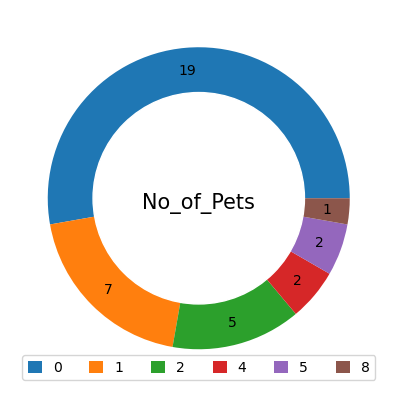

In [224]:
plt.figure(figsize=(9,5), dpi=100)
v_counts = absent.groupby('ID').No_of_Pets.unique().apply(lambda x: sum(x)).value_counts()
plt.pie(x = v_counts, autopct = lambda x: '{:.0f}'.format(x * v_counts.sum()/100), radius = 1, pctdistance = 0.85)
plt.title('No_of_Pets', loc = 'Center', y = 0.45, fontsize = 15)
plt.legend(labels = sorted(v_counts.index), loc = 'lower center', 
           ncol = len(v_counts.index), handlelength=1, handleheight=1)
circle = plt.Circle(xy = (0,0), radius = 0.7, color = 'white')
ax = plt.gca()
ax.add_artist(circle)
plt.show()

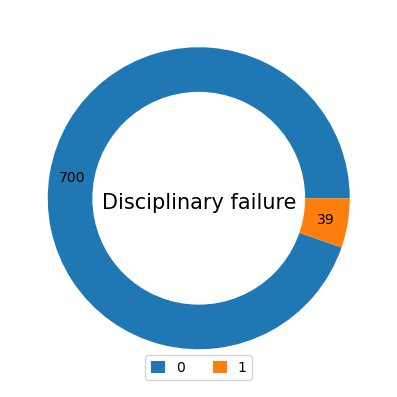

In [211]:
plt.figure(figsize=(9,5), dpi=100)
v_counts = absent.Disciplinary_failure.value_counts()
plt.pie(x = v_counts, autopct = lambda x: '{:.0f}'.format(x * v_counts.sum()/100), radius=1, pctdistance = 0.85)
plt.title('Disciplinary failure', loc = 'Center', y = 0.45, fontsize = 15)
plt.legend(labels = sorted(v_counts.index), loc = 'lower center', 
           ncol = len(v_counts.index), handlelength=1, handleheight=1)
circle = plt.Circle(xy = (0,0), radius = 0.7, color = 'white')
ax = plt.gca()
ax.add_artist(circle)
plt.show()

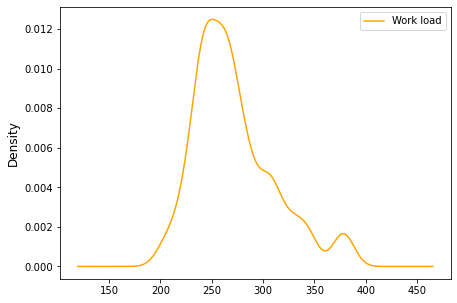

In [296]:
plt.figure(figsize = (7, 5))
# absent['Transportation_expense'].plot(kind = 'density')
absent['Work_load'].plot(kind = 'density', color = 'orange')
plt.legend(['Work load'])
plt.ylabel('Density', fontsize = 12)
plt.show()

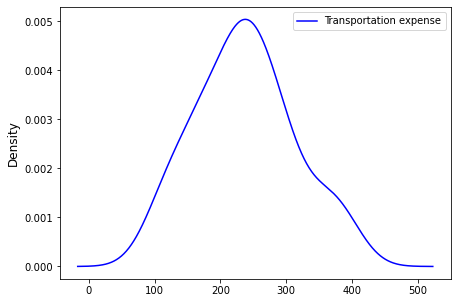

In [8]:
plt.figure(figsize = (7, 5))
# absent['Transportation_expense'].plot(kind = 'density')
absent.groupby('ID').Transportation_expense.unique().apply(lambda x: sum(x)).plot(kind = 'density', color = 'blue')
plt.legend(['Transportation expense'])
plt.ylabel('Density', fontsize = 12)
plt.show()

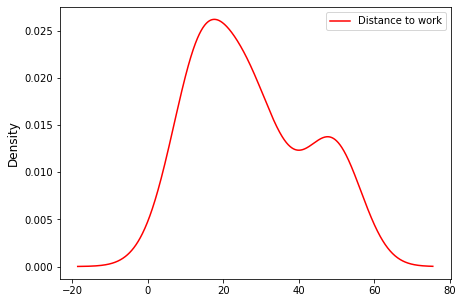

In [9]:
plt.figure(figsize = (7, 5))
# absent['Distance_from_Residence_to_Work'].plot(kind = 'density')
absent.groupby('ID').Distance_from_Residence_to_Work.unique().apply(lambda x: sum(x)).plot(kind = 'density', color = 'red')
plt.legend(['Distance to work'])
plt.ylabel('Density', fontsize = 12)
plt.show()

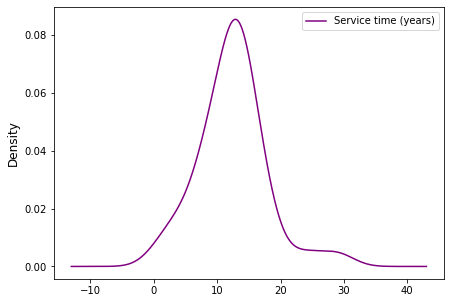

In [306]:
plt.figure(figsize = (7, 5))
# absent['Service_time'].plot(kind = 'density')
absent.groupby('ID').Service_time.unique().apply(lambda x: sum(x)).plot(kind = 'density', color = 'purple')
plt.legend(['Service time (years)'])
plt.ylabel('Density', fontsize = 12)
plt.show()

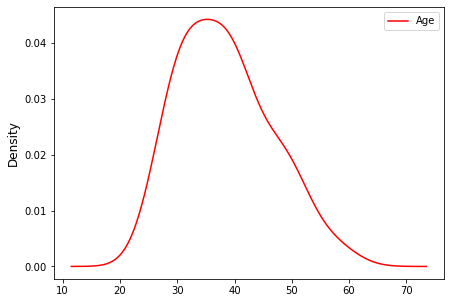

In [318]:
plt.figure(figsize = (7, 5))
# absent['Age'].plot(kind = 'density')
absent.groupby('ID').Age.unique().apply(lambda x: sum(x)).plot(kind = 'density', color = 'red')
plt.legend(['Age'])
plt.ylabel('Density', fontsize = 12)
plt.show()

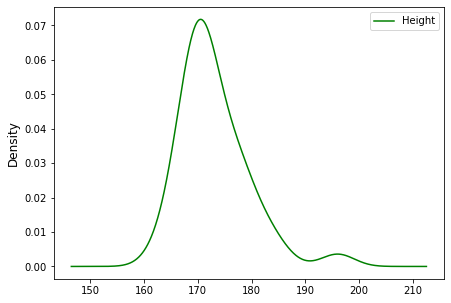

In [311]:
plt.figure(figsize = (7, 5))
# absent['Height'].plot(kind = 'density')
absent.groupby('ID').Height.unique().apply(lambda x: sum(x)).plot(kind = 'density', color = 'green')
plt.legend(['Height'])
plt.ylabel('Density', fontsize = 12)
plt.show()

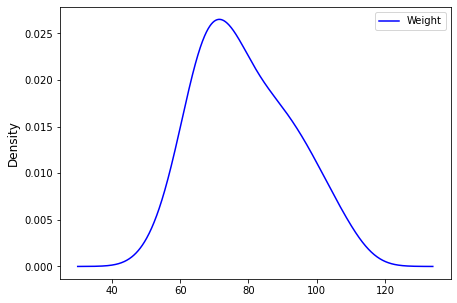

In [10]:
plt.figure(figsize = (7, 5))
# absent['Weight'].plot(kind = 'density')
absent.groupby('ID').Weight.unique().apply(lambda x: sum(x)).plot(kind = 'density', color = 'blue')
plt.legend(['Weight'])
plt.ylabel('Density', fontsize = 12)
plt.show()

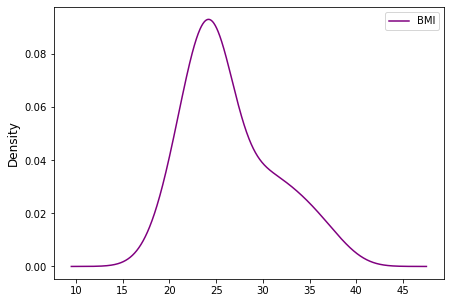

In [8]:
plt.figure(figsize = (7, 5))
# absent['Body_mass_index'].plot(kind = 'density')
absent.groupby('ID').Body_mass_index.unique().apply(lambda x: sum(x)).plot(kind = 'density', color = 'purple')
plt.legend(['BMI'])
plt.ylabel('Density', fontsize = 12)
plt.show()

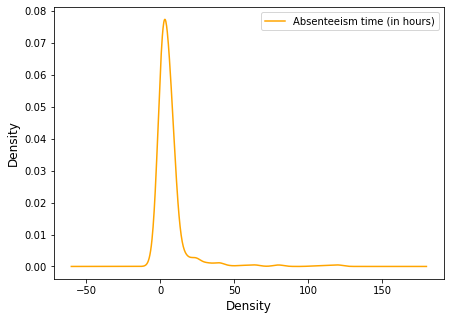

In [66]:
plt.figure(figsize = (7, 5))
absent['Absenteeism_time_hours'].plot(kind = 'density', color = 'orange')
plt.legend(['Absenteeism time (in hours)'])
plt.ylabel('Density', fontsize = 12)
plt.xlabel('Density', fontsize = 12)
plt.show()

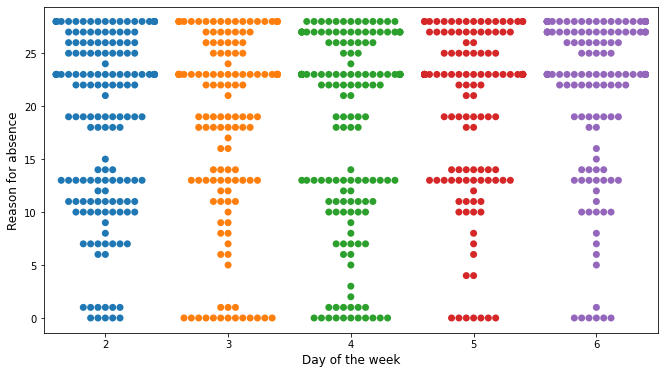

In [50]:
plt.figure(figsize = (11, 6))
x = absent['Day_of_the_week']
y = absent['Reason_for_absence']
# plt.legend(['Absenteeism time (in hours)'])
sns.swarmplot(x, y, size = 7)
plt.ylabel('Reason for absence', fontsize = 12)
plt.xlabel('Day of the week', fontsize = 12)
plt.show()